In [9]:
import pandas as pd

In [10]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [11]:
df.shape

(150, 6)

In [12]:
X = df.loc[:,['PetalLengthCm','PetalWidthCm']]

In [13]:
import matplotlib.pyplot as plt

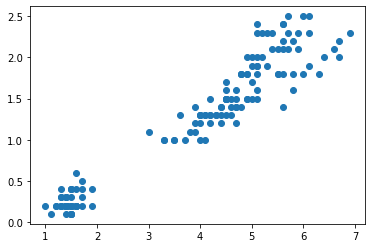

In [14]:
plt.scatter(X.PetalLengthCm,X.PetalWidthCm)

In [15]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [19]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 4, 2, 4, 2, 2, 4, 0, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 0, 2, 2, 4, 0, 2, 4, 0, 0, 2, 2, 4, 4,
       2, 0, 2, 4, 2, 2, 0, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2])

In [20]:
import numpy as np
cluster_colors=np.array(['red','green','blue','brown','yellow'])

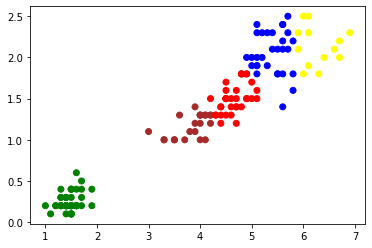

In [21]:
plt.scatter(X.PetalLengthCm,X.PetalWidthCm,color=cluster_colors[model.labels_])
plt.show()

In [22]:
model.cluster_centers_# location of each centroid

array([[4.64857143, 1.5       ],
       [1.464     , 0.244     ],
       [5.39666667, 2.05333333],
       [3.83181818, 1.16818182],
       [6.28461538, 2.13846154]])

# Elbow Method
 tells us how many clusters do we need

In [23]:
from scipy.spatial.distance import cdist # cdist function is used to find distance between clusters center and data point


In [24]:
error=[]# calculate error for k1,k2,k3,...,and put these in this list

for k in range(1,16):# how many cluster you gonna need
    model=KMeans(n_clusters=k)# cluster creation first time k1 than k2 so on till k16
    model.fit(X)# training our model on the number of clusters we have
    #calculate disence between centroids ans data points
    dist=cdist(X,model.cluster_centers_)#model.cluster_centers_ location of each centroid from X-axis and Y-Axis X contain Actual data
    #print(dist)
    # only keep the distances between data point and its own center
    act_dist=np.min(dist,axis=1)# select minimum distsnce of every datapoint from centroids
#     if k==1:
#         print(act_dist)
    
    # add all the distances
    total_distance_error=sum(act_dist)
    error.append(total_distance_error)
error#print error
    

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[256.0398605319133,
 87.65887594972752,
 55.388565479609625,
 44.95723374524917,
 39.836118964113865,
 35.197882902851696,
 31.78982581582981,
 29.601202632390446,
 27.7447871556845,
 25.730023873012225,
 24.54107363869964,
 23.428093992914572,
 22.60014388254,
 21.35930914240766,
 20.653114946761878]

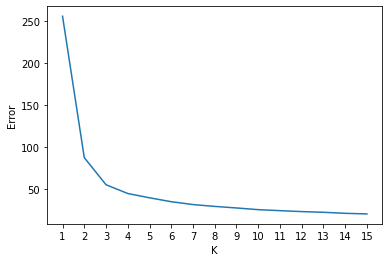

In [25]:
plt.xticks(range(1,16))
plt.xlabel('K')
plt.ylabel('Error')
plt.plot(range(1,16),error)